# Open-cell tests

In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.print_figure_kwargs = {'facecolor' : 'black'}

# og python libs
import re
import pprint
import numpy as np


# classic DS libs

# viz libs
import matplotlib as matplotlib
import matplotlib.pyplot as plt

# scipy

# lmfit things

# ML

pp = pprint.PrettyPrinter(depth=4)

In [2]:
# custom
import sys
sys.path.append('../../../../../')
from my_utils import defs as cp
from my_utils.classes import CEPAS_benchmark, CEPAS_noise_info
cp.hello_test()
cp.fix_dark_theme()

HAPI version: 1.2.2.3
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2021 are now available in HAPI code

           MIT license: Copyright 2021 HITRAN team, see more at http://hitran.org. 

           If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005

           ATTENTION: This is the core version of the HITRAN Application Programming Interface.
                      For more efficient implementation of the absorption coefficient routine, 
                      as well as for new profiles, parameters and other functional,
      

# Test paths

In [3]:
ps = ["./" + i + "/" for i in cp.dir_match("./", "bypass")]
print(ps)
pattern = re.compile(r"./bypass-(\d+)-b(\d+)f(y|n)v(y|n)r(y|n)i(\d+)o(\d+)")
bypass_open = [re.findall(pattern, p) for p in ps]
print(bypass_open)

col_names = {
    0: 'time',          # time (measurement tick, stopped on gasx, arbitrary)
    1: 'offset1',       # DFB offset-1
    2: 'P1',            # onboard pressure sensor (blue tube)
    3: 'H3',            # 3rd harmonic (L1H1)
    4: 'H2',            # 2nd harmonic (L1H2)
    5: 'P_las',         # laser power (some volts)
    6: 'T_las',         # diode temp (Kelvin)
    7: 'RH',            # humidity sensor (external)
    8: 'Pressure'       # sensor (external)
}

pressure_list = [900]
freq_list_2 = [20, 30, 40, 50, 60, 70, 80, 90, 100, 
               110, 120, 130, 140, 150, 160, 170, 180, 190]

benchmark_path_2 = ps[1]
patterns = cp.create_regex_strings(pressure_list, freq_list_2)
test_bench_files = cp.dir_match_dict(benchmark_path_2, patterns) 

pp.pprint(test_bench_files)


['./bypass-5-b5fnvnryi0o0/', './bypass-5-b5fnvnryi0o4/', './bypass-5-b5fnvnryi3o3/', './bypass-5-b5fnvnryi4o4/']
[[('5', '5', 'n', 'n', 'y', '0', '0')], [('5', '5', 'n', 'n', 'y', '0', '4')], [('5', '5', 'n', 'n', 'y', '3', '3')], [('5', '5', 'n', 'n', 'y', '4', '4')]]
{900: {20: ['gasx_900_32_20__msr__0'],
       30: ['gasx_900_32_30__msr__1'],
       40: ['gasx_900_32_40__msr__2'],
       50: ['gasx_900_32_50__msr__3'],
       60: ['gasx_900_32_60__msr__4'],
       70: ['gasx_900_32_70__msr__5'],
       80: ['gasx_900_32_80__msr__6'],
       90: ['gasx_900_32_90__msr__7'],
       100: ['gasx_900_32_100__msr__8'],
       110: ['gasx_900_32_110__msr__9'],
       120: ['gasx_900_32_120__msr__10'],
       130: ['gasx_900_32_130__msr__11'],
       140: ['gasx_900_32_140__msr__12'],
       150: ['gasx_900_32_150__msr__13'],
       160: ['gasx_900_32_160__msr__14'],
       170: ['gasx_900_32_170__msr__15'],
       180: ['gasx_900_32_180__msr__16'],
       190: ['gasx_900_32_190__msr__17']}}

# Manual operations

In [4]:
# %%html
# <style>
# .cell-output-ipywidget-background {
#    background-color: transparent !important;
# }
# .jp-OutputArea-output {
#    background-color: transparent;
# }  
# </style>

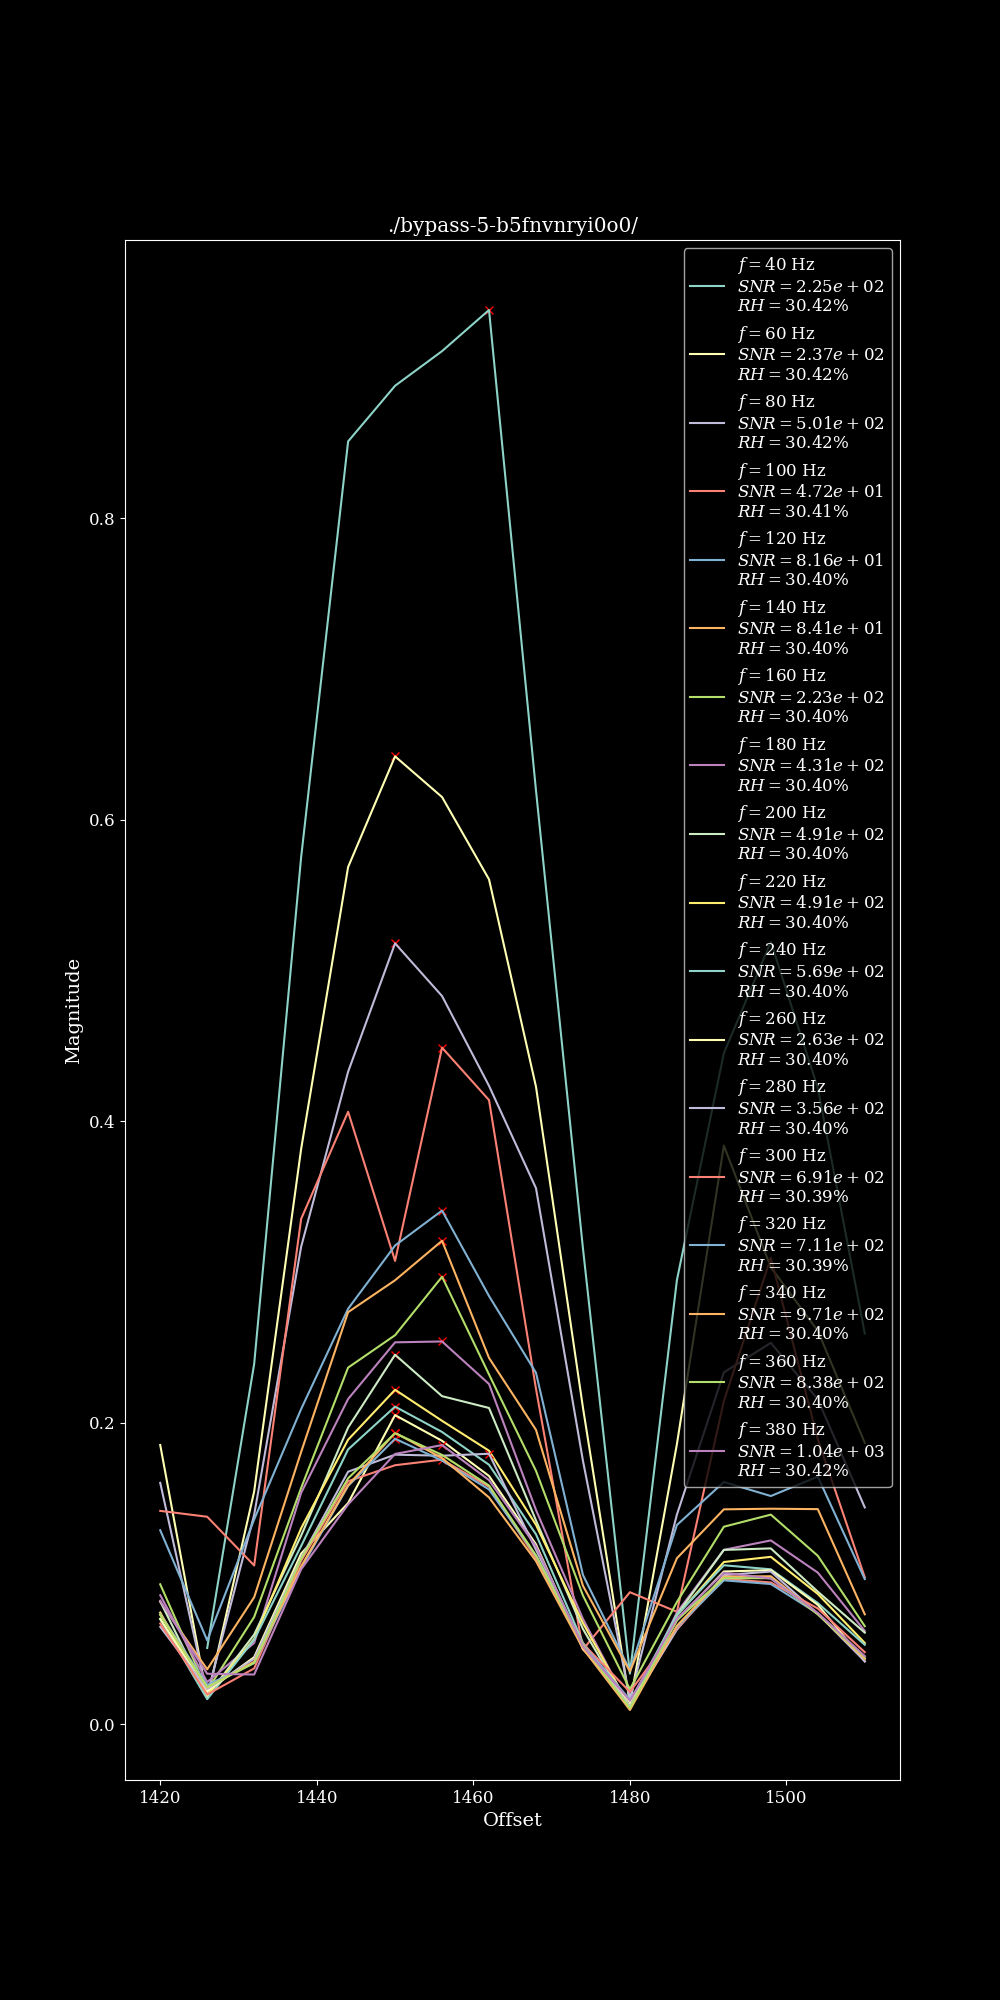

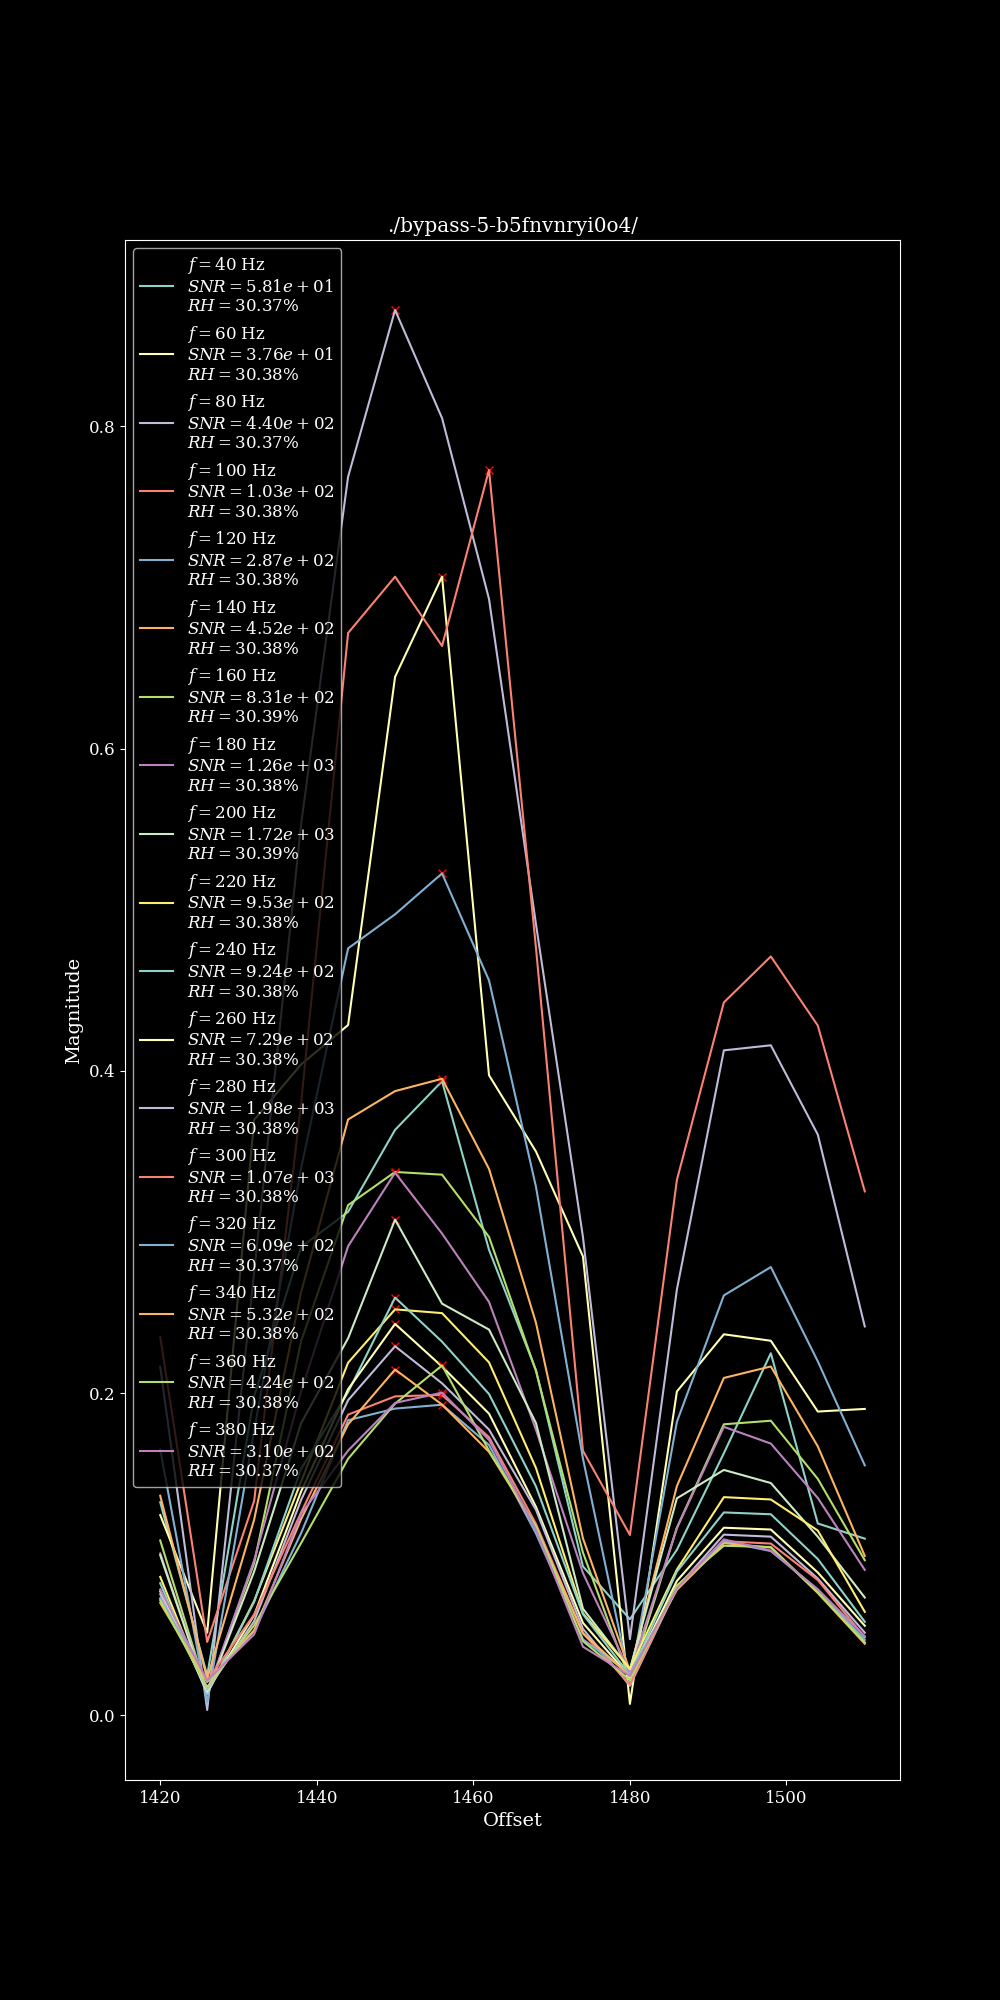

Low importance variable, replaced with none                   
 error: zero-size array to reduction operation maximum which has no identity
There were no such frequencies...
Low importance variable, replaced with none                   
 error: zero-size array to reduction operation maximum which has no identity
There were no such frequencies...
Low importance variable, replaced with none                   
 error: zero-size array to reduction operation maximum which has no identity
There were no such frequencies...
Low importance variable, replaced with none                   
 error: zero-size array to reduction operation maximum which has no identity
There were no such frequencies...
Low importance variable, replaced with none                   
 error: zero-size array to reduction operation maximum which has no identity
There were no such frequencies...
Low importance variable, replaced with none                   
 error: zero-size array to reduction operation maximum which has no

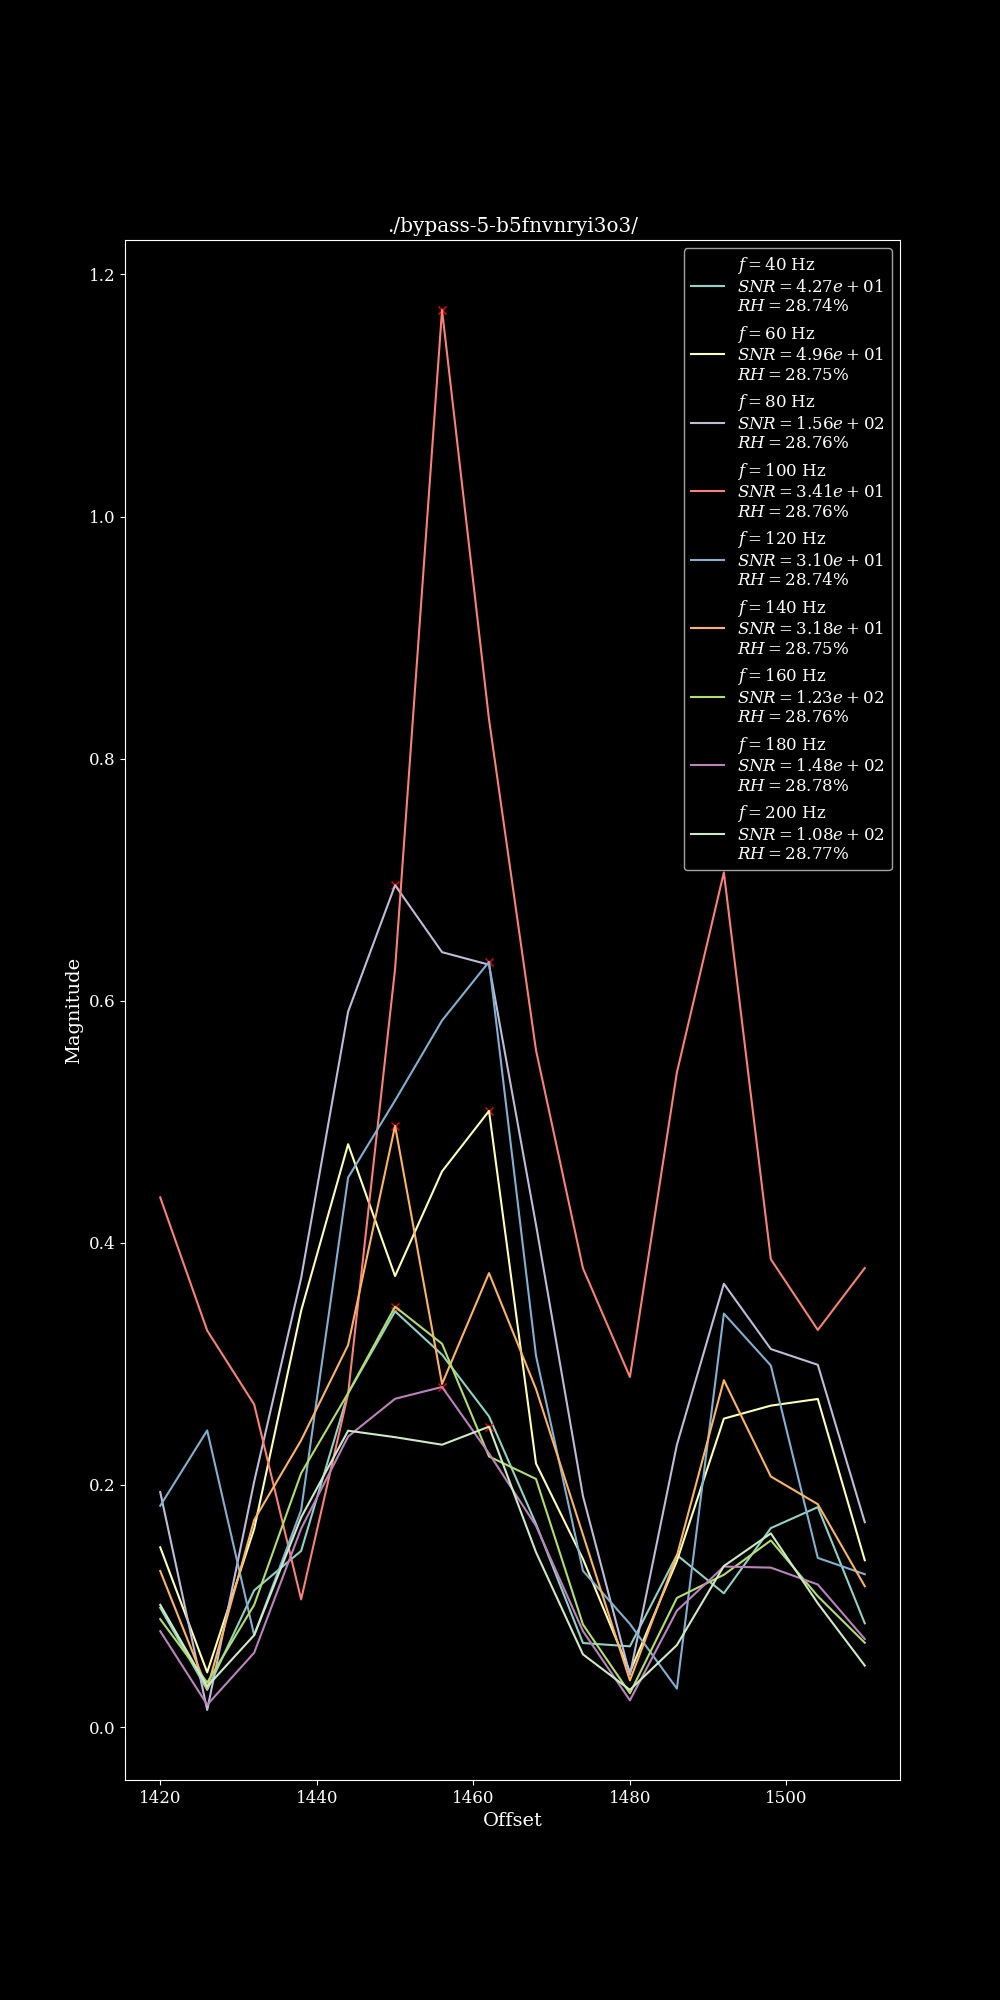

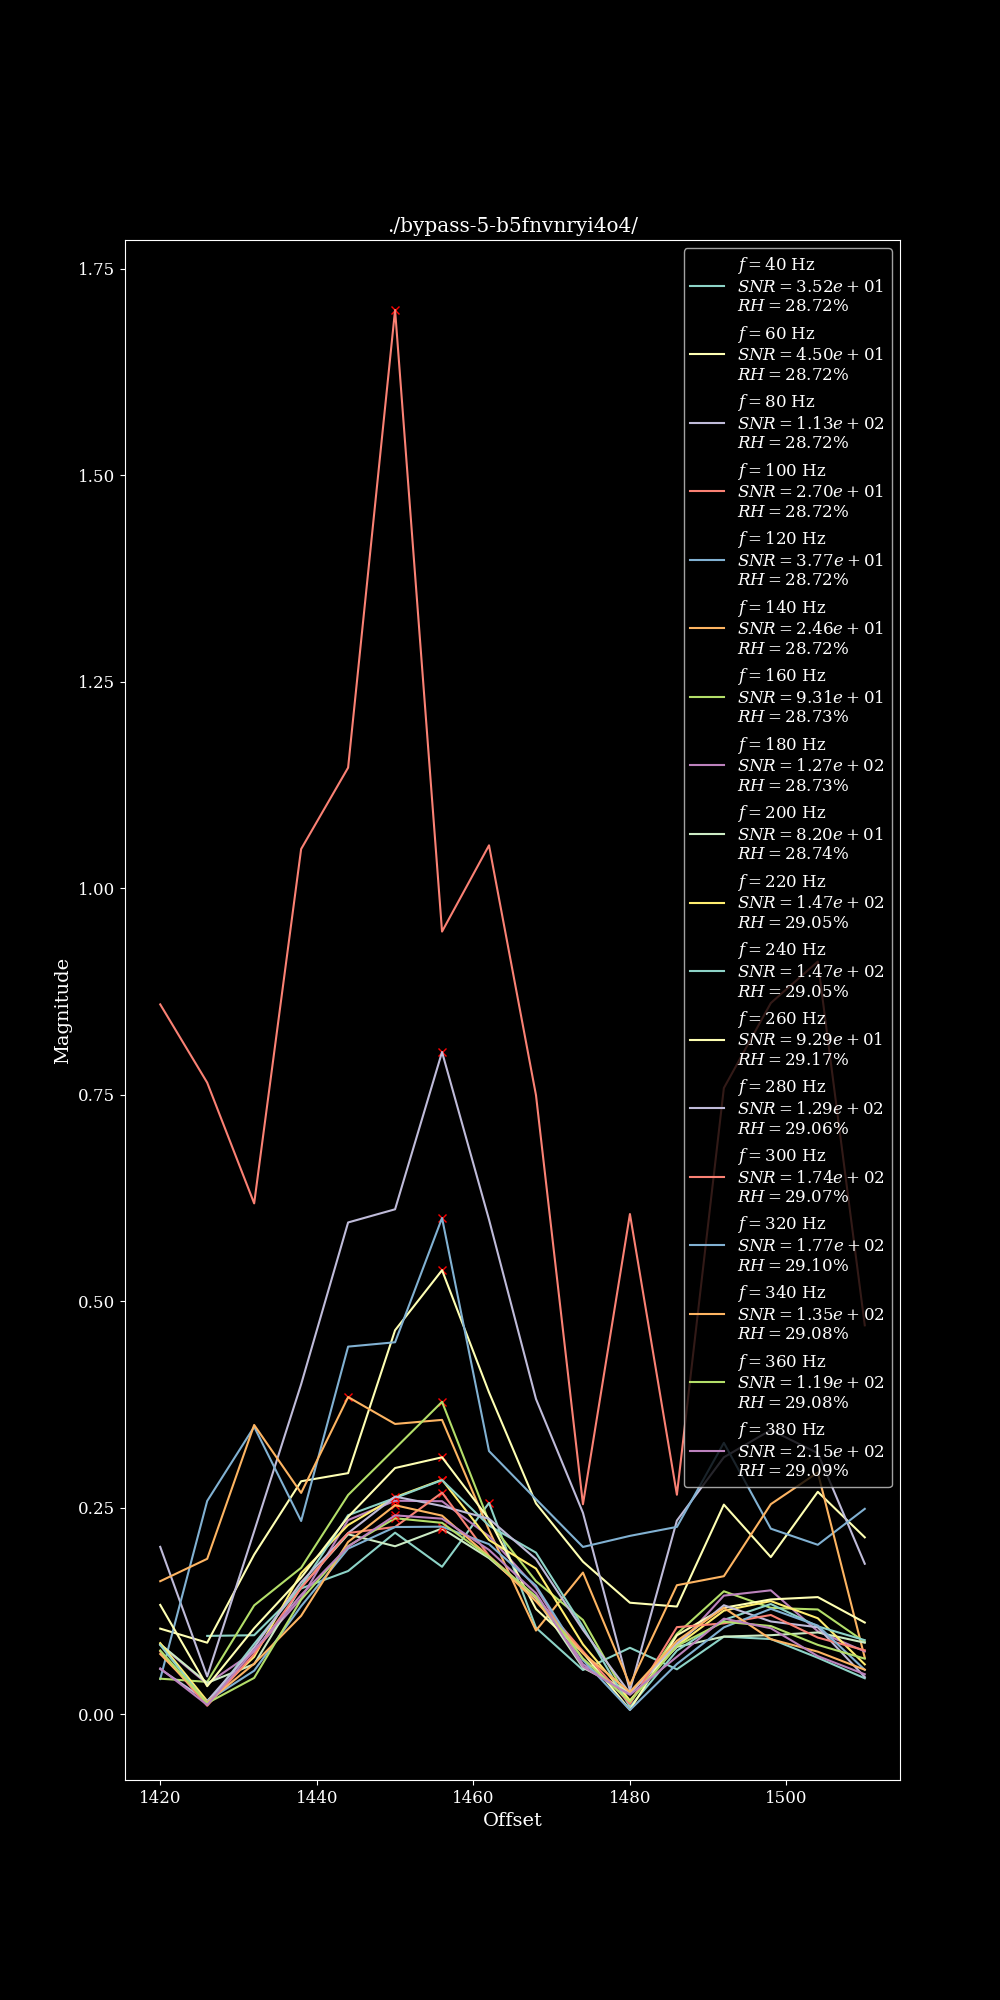

In [5]:
%matplotlib widget

maxs = {}
ps_dict = {ps[i]: cp.dir_match(ps[i], "gasx") for i in range(len(ps))}
# print(ps_dict)

values = list(ps_dict.values())

plt.close('all')

for p_idx in range(len(ps)):
    plt.figure(figsize=(10, 20))
    plt.title(f"{ps[p_idx]}")
    maxs[ps[p_idx]] = []
    for freq in freq_list_2:
        try:
            bench_test = CEPAS_benchmark(ps[p_idx], test_bench_files, pressure_list[0], freq)
        except ValueError as e:
            print('There were no such frequencies...')
            continue
        bench_test.add_magnitude()

        df = bench_test.spectra.spectra_list[0]
        y = df['magnitude_pnorm']
        x = df['offset1']
        rh = df['RH'].mean()

        bg = CEPAS_noise_info(ps[p_idx]+'noise-tests/')
        bg = bg.get_noise_at(freq)
        
        maxs[ps[p_idx]].append(y.max())
        SNR = y.max() / bg

        plt.plot(
            df[
                df[
                    'magnitude_pnorm'] == df[
                        'magnitude_pnorm'].max()]['offset1'],
            df[
                df[
                    'magnitude_pnorm'] == df[
                        'magnitude_pnorm'].max()]['magnitude_pnorm'],
            "rx")
        plt.plot(x, y, label=f"$f={2*freq}\\ \\text{{Hz}}$\n$SNR={SNR:.2e}$\n$RH={rh:.2f}\\%$")

    plt.legend()
    plt.xlabel("Offset", size=14)
    plt.ylabel("Magnitude", size=14)
    plt.show()



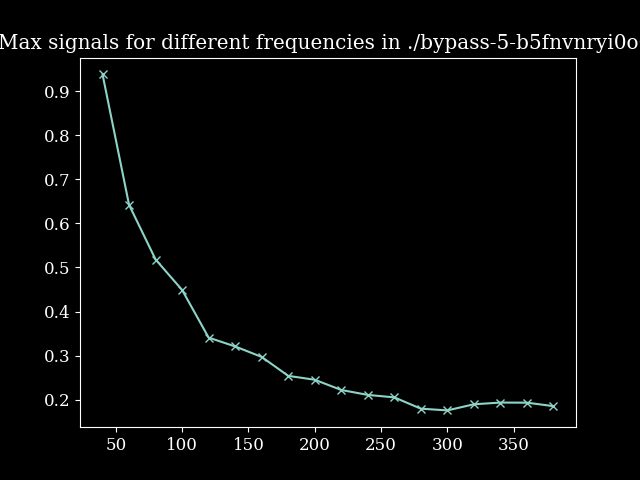

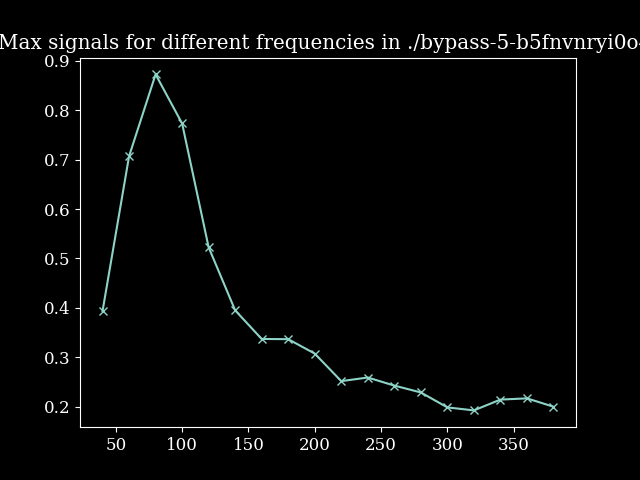

shortening the freqlist


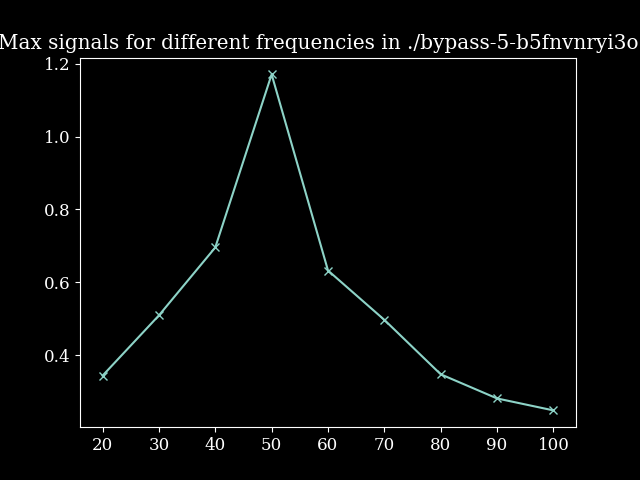

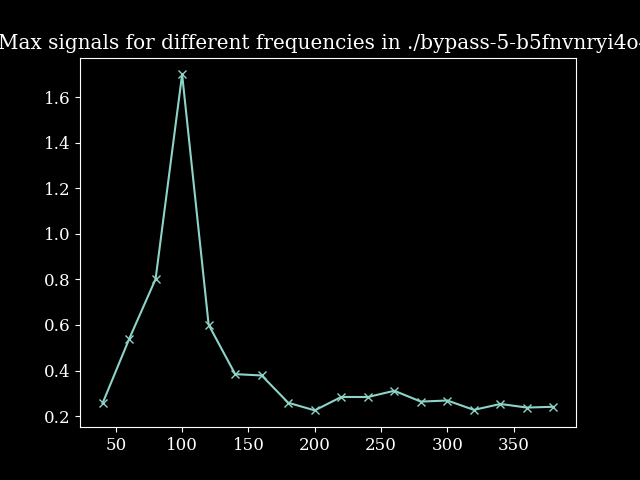

In [6]:
plt.close()
for k, v in maxs.items():
    plt.figure()
    plt.title(f'Max signals for different frequencies in {k}')
    x = np.array(freq_list_2)*2
    y = v
    try:
        plt.plot(x, y, '-x')
    except ValueError as e:
        print("shortening the freqlist")   
        x = np.array(freq_list_2*2)[:9]
        plt.plot(x, y, '-x')
    plt.show()





In [7]:
print(matplotlib.matplotlib_fname())
print(matplotlib.rcParams['axes.prop_cycle'])

/home/andy/.config/matplotlib/matplotlibrc
cycler('color', ['#8dd3c7', '#feffb3', '#bfbbd9', '#fa8174', '#81b1d2', '#fdb462', '#b3de69', '#bc82bd', '#ccebc4', '#ffed6f'])
